Make plot of mean SST with arrows for currents

Include boxes with all release sites

In [1]:
from cmocean import cm
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
import numpy as np

/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['savefig.dpi'] = 200

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

In [4]:
# grab data

# get mean SST
myfile = '/Users/chha5666/Documents/Clim_var/Fisheries_metric/Data/mean.nday1.nc'
mydata = nc.Dataset(myfile,'r')
sst = mydata.variables['SST'][0,:,:]


In [5]:
# get lat and lon 
lat =mydata.variables['TLAT'][:]
lon = mydata.variables['TLONG'][:]

# manipulate data to plot
# make longitudes monotonically increasing
lon = np.where(np.greater_equal(lon,min(lon[:,0])),lon-360,lon)

# stack grids side-by-side (in longitudinal direction), so
# any range of longitudes may be plotted on a world map
lon = np.concatenate((lon,lon+360),1)
lat = np.concatenate((lat,lat),1)
lon = lon - 360

In [6]:
# limits of plot
# global
limN, limS, limW, limE = 84.,-80.,-280,80
add = 'global'

draw boxes for all the release sites

Each site has a center and a lat/lon box

Plan: just save all the centers and can make the boxes from this

In [ ]:
# limits of plot
# global
limN, limS, limW, limE = 84.,-80.,-280,80
add = 'global'

In [131]:
site = ['IND', 'FL', 'WFL', 'MEX', 'BRAZ', 'EAU', 'WAU', 'SAF', 'YI', 'NAF']
slat = np.array([20.3, 25.9, 27.2, 20.2, -12.7, -24.7, -25.8, -27.4, 30.3, 16.1])
slon = np.array([58.7, -80.1, -82.5, -87.4, -37.9, 152.4, 113, 32.7, 130.5, -22.9])
# adjust to fit map 
slon[slon > 80] = slon[slon>80]-360

In [117]:
rspread = 0.5
nlat = slat + rspread
slat = slat - rspread
elon = slon + rspread
wlon = slon - rspread


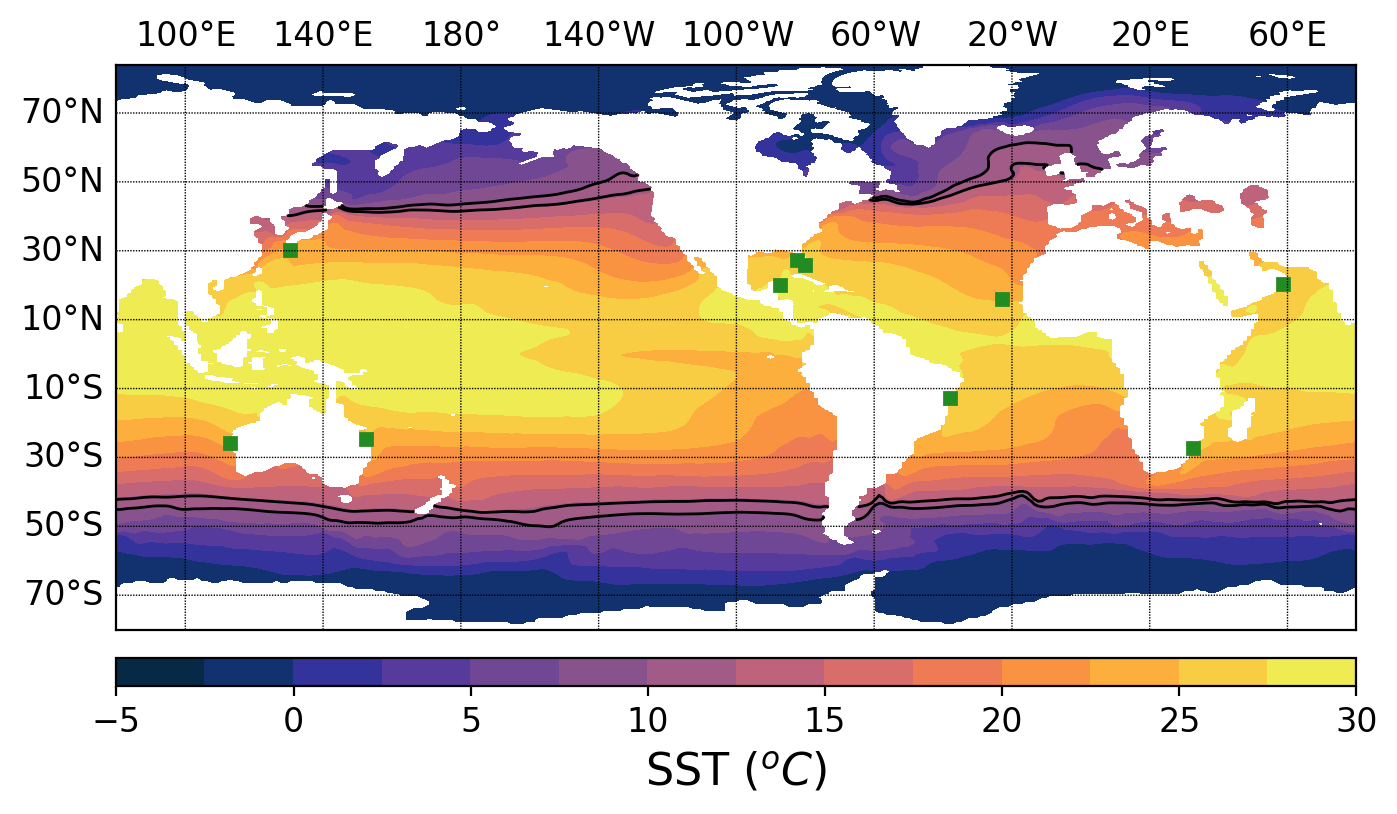

In [162]:
mpl.rcParams['lines.linewidth']= 0.5
mpl.rcParams['font.size'] = 12

# plot as subplots, then initialize figure here
#fig = plt.figure(figsize=(fw,fh), facecolor = 'w')
#cmap = 'jet'
#cmap = 'CMRmap'
cmap = cm.thermal


fw,fh = 8,8
fig = plt.figure(figsize=(fw,fh), facecolor = 'w')
proj = 'cyl'

cvmax = 30


var_name = 'SST'
var = sst
punits = '$^{o}C$'
# convert
#var = var*cfactorP
# manipulate data to plot
temp = np.ma.concatenate((var,var),1)


ax = fig.add_subplot(1,1,1)
m = Basemap(projection=proj, llcrnrlon=limW, \
      urcrnrlon=limE, llcrnrlat=limS, urcrnrlat=limN, resolution='l')
x, y = m(lon,lat)


#m.drawcoastlines(linewidth=0.75, color = 'grey')
#m.fillcontinents(color='white')
#m.fillcontinents(color='darkgrey',lake_color='darkgrey',zorder=1)
#coasts = m.drawcoastlines(zorder=2,linewidth=0.5)


levels = np.arange(-5,32.5,2.5)
im1 = m.contourf(x,y,temp,levels, cmap = cmap )
im2 = m.contour(x,y,temp, [10, 12], colors = 'k', linewidths = [1,1])

# plot nesting sites
m.plot(slon,slat,'s', ms = 4, color = 'forestgreen')
#m.plot(slon,slat,'s', ms = 4, color = 'seagreen')

# # loop over sites and plot each box
# # b/c cylindrical don't need to remap
# m.plot([w[0],e[0]],[n[0],n[0]],'k')
# m.plot([w[0],e[0]],[s[0],s[0]],'k')
# m.plot([w[0],w[0]],[s[0],n[0]],'k')
# m.plot([e[0],e[0]],[s[0],n[0]],'k')


m.drawparallels(np.arange(-90.,90.,20.), linewidth=0.5, labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,40.), linewidth=0.5, labels=[0,0,1,0])
cbar = m.colorbar(im1,location='bottom',pad="5%")

cbar.set_label(var_name + ' ('+ punits + ')', fontsize=16)
#plt.title(ptitle)

#ptitle = date
#plt.suptitle(ptitle, fontsize = 20)

In [ ]:
# need to add on velocites in some way
# get surface velocity means, did I make these?
# quiver should work no problem in cylindrical coordinates
# will need to subsample in space
# make arrows scale with speed
# if that doesn't look good, just draw them

In [152]:
spath= '/Users/chha5666/Documents/SimTurtle/Major_Ocean_Currents_arrowPolys_30m_8/'
sfile = 'Major_Ocean_Currents_arrowPolys_30m_8'

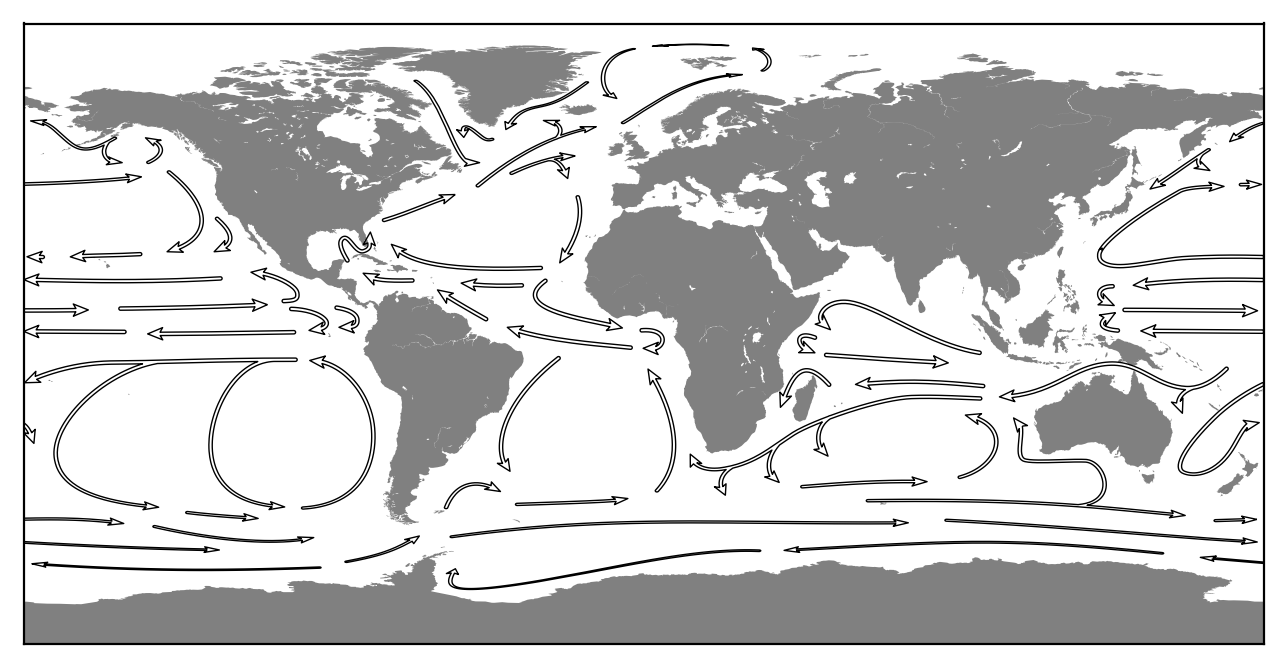

In [158]:
fig = plt.figure(figsize=(fw,fh), facecolor = 'w')

ax = fig.add_subplot(1,1,1)
m = Basemap(projection=proj, resolution='l')
m.fillcontinents('grey')
shape_info = m.readshapefile(spath+sfile,'test')
# I don't think I am going to be happy with this. I have model data

In [160]:
print(shape_info)

(74, 5, [-179.999988540844, -74.3130833885463, 0.0, 0.0], [179.999988540844, 83.9836837874312, 0.0, 0.0], <matplotlib.collections.LineCollection object at 0x12e3a7f98>)
